In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['font.family'] = "Malgun Gothic"

data = pd.read_csv("dataset/arugula2.csv")

display(data.isnull().sum())

data = data.dropna()


X = data[['\naverage temperature', '\nhighest temperature','\nHighest-lowest temperature','\nchoejeogion\nlowest temperature']]
y = data['average price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)


date                                  0
average price                         2
\naverage temperature                90
\nhighest temperature                90
\nHighest-lowest temperature         90
\nchoejeogion\nlowest temperature    90
\nMonthly precipitation              90
\nhighest humidity                   90
\nlowest humidity                    90
\nsunlight                           90
dtype: int64

RandomForestRegressor(random_state=42)

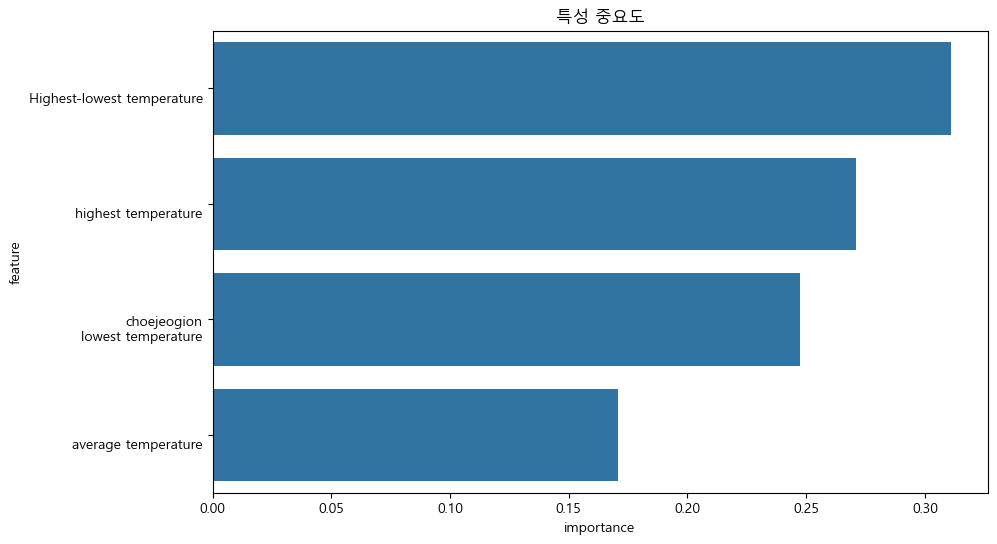

In [53]:

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('특성 중요도')
plt.show()



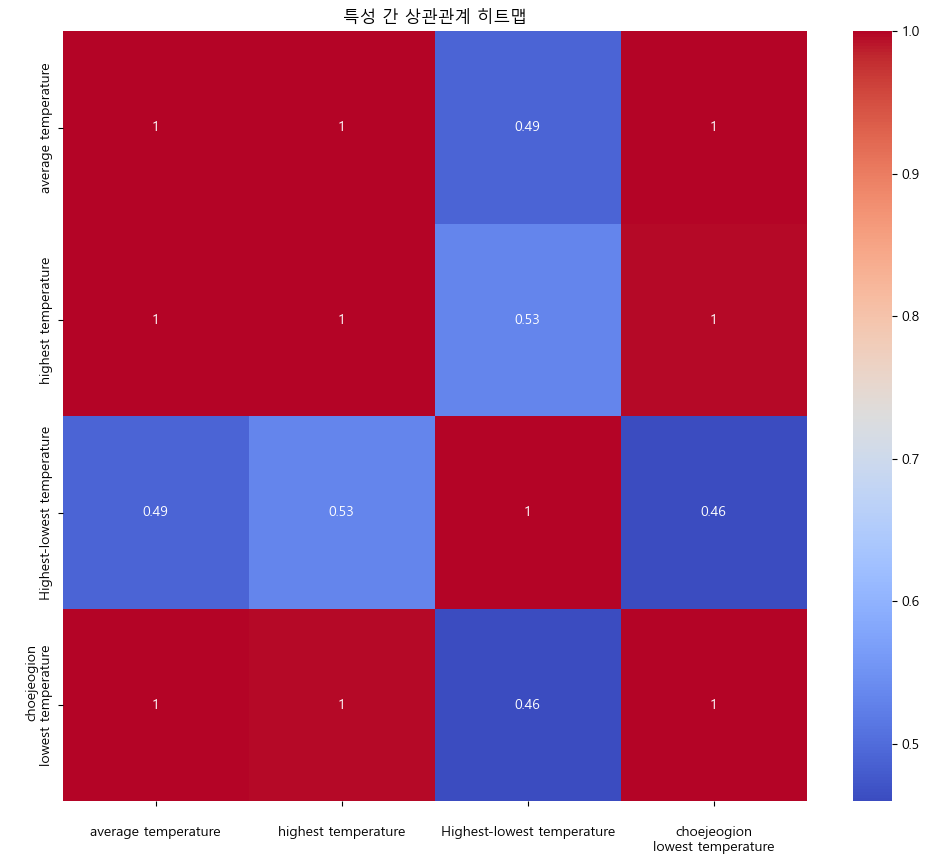

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('특성 간 상관관계 히트맵')
plt.show()


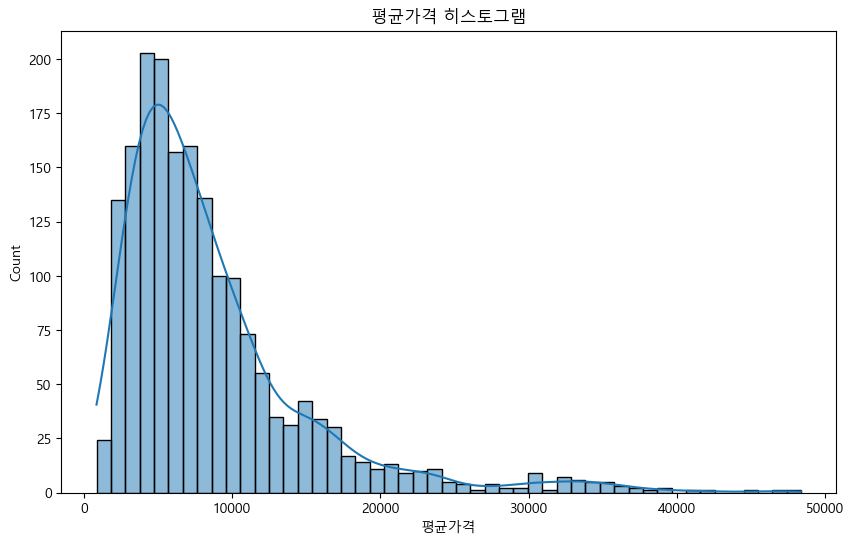

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(y, kde=True)
plt.title('평균가격 히스토그램')
plt.xlabel("평균가격")
plt.show()

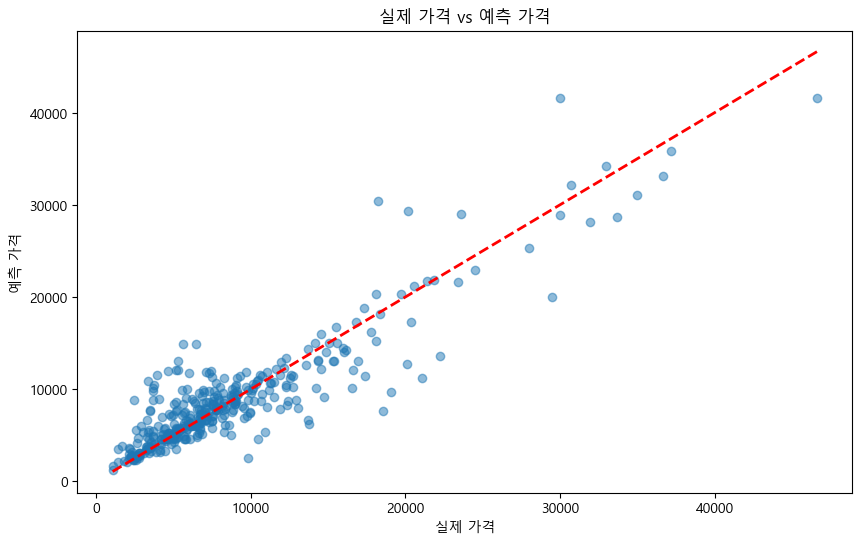

평균 제곱 오차: 7986122.61
R2 score: 0.81


In [51]:
y_pred = rf.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('실제 가격 vs 예측 가격')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"평균 제곱 오차: {mse:.2f}")
print(f"R2 score: {r2:.2f}")
